In [1]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
figure(figsize=(25, 35), dpi=80)
import librosa
import scipy.stats
import numpy as np
from deeprhythm import DeepRhythmPredictor
from IPython.display import Audio

model = DeepRhythmPredictor(quiet=True)
bpm, confidence = model.predict(r"U:\TFG\SoundLight\resources\Nigel Stanford - Cymatics.mp3", include_confidence=True)
bpm, confidence


c:\Users\Alvaro\AppData\Local\Programs\Python\Python312\Lib\site-packages\deeprhythm\model\predictor.py:20: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_di

(93.0, 0.7461233139038086)

<Figure size 2000x2800 with 0 Axes>

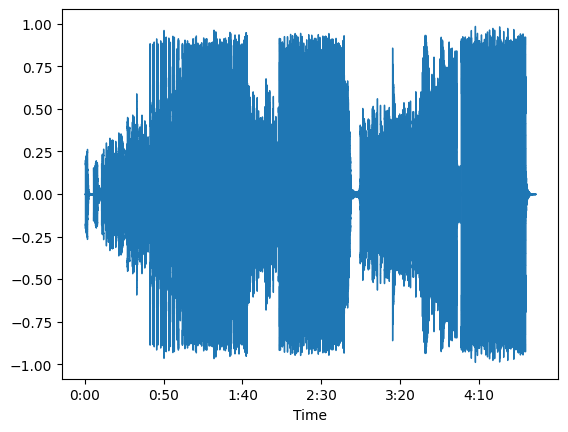

In [5]:
y, sr = librosa.load(r"U:\TFG\SoundLight\resources\Nigel Stanford - Cymatics.mp3")

tempo, beats = librosa.beat.beat_track(y=y, sr=sr)

librosa.display.waveshow(y, sr=sr)

In [ ]:
click_track_1 = librosa.clicks(frames=beats, sr=sr, length=len(y))
Audio(data=y+click_track_1, rate=sr)


In [ ]:

beats = librosa.frames_to_time(beats, sr=sr)
onset_env = librosa.onset.onset_strength(y=y, sr=sr)
pulse = librosa.beat.plp(onset_envelope=onset_env, sr=sr)
# Or compute pulse with an alternate prior, like log-normal
prior = scipy.stats.lognorm(loc=np.log(120), scale=120, s=1)
pulse_lognorm = librosa.beat.plp(onset_envelope=onset_env, sr=sr,prior=prior)
melspec = librosa.feature.melspectrogram(y=y, sr=sr)
"""
fig, ax = plt.subplots(nrows=3, sharex=True)
librosa.display.specshow(librosa.power_to_db(melspec,ref=np.max),x_axis='time', y_axis='mel', ax=ax[0])
ax[0].set(title='Mel spectrogram')
ax[0].label_outer()
ax[1].plot(librosa.times_like(onset_env),librosa.util.normalize(onset_env),label='Onset strength')
ax[1].plot(librosa.times_like(pulse),librosa.util.normalize(pulse),label='Predominant local pulse (PLP)')
ax[1].set(title='Uniform tempo prior [30, 300]')
ax[1].label_outer()
ax[2].plot(librosa.times_like(onset_env),librosa.util.normalize(onset_env),label='Onset strength')
ax[2].plot(librosa.times_like(pulse_lognorm),librosa.util.normalize(pulse_lognorm),label='Predominant local pulse (PLP)')
ax[2].set(title='Log-normal tempo prior, mean=120', xlim=[5, 20])
ax[2].legend()
"""

tempo, beats = librosa.beat.beat_track(y=y, sr=sr, bpm = bpm)
beats_plp = np.flatnonzero(librosa.util.localmax(pulse))

fig, ax = plt.subplots(nrows=2, sharex=True, sharey=True, **{"figsize": (50,25), "dpi": 80})
times = librosa.times_like(onset_env, sr=sr)
ax[0].plot(times, librosa.util.normalize(onset_env),label='Onset strength')
ax[0].vlines(times[beats], 0, 1, alpha=0.5, color='r',linestyle='--', label='Beats')
ax[0].legend()
ax[0].set(title='librosa.beat.beat_track')
ax[0].label_outer()
# Limit the plot to a 15-second window
times = librosa.times_like(pulse, sr=sr)
ax[1].plot(times, librosa.util.normalize(pulse),label='PLP')
ax[1].vlines(times[beats_plp], 0, 1, alpha=0.5, color='r',linestyle='--', label='PLP Beats')
ax[1].legend()
ax[1].set(title='librosa.beat.plp', xlim=[0, 60])
ax[1].xaxis.set_major_formatter(librosa.display.TimeFormatter())

